In [1]:
from IPython.display import clear_output

In [2]:
# Download the required libraries (needed when running outside colab where the environment doesn't come pre-loaded with libraries)

# %pip install torch
# %pip install numpy
# %pip install matplotlib

# clear_output()

In [3]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt

# Contents

In this notebook, we will implement attention by hand in numpy and pytorch

## Numpy Implementation

The following is the implementation of attention in numpy.

One thing to keep in mind is that this attentionis simple calculation and not a trainable layer, as it DOES NOT learn the initial matrices that we multiply the query, key and value with.

We will cover them in pytorch's implementation (since it's easier to do back propogation in torch)

In [67]:
def softmax(x, axis=None):

    # safe softmax
    # Ensure numerical stability by subtracting the maximum value
    # along the specified axis before exponentiating.
    # max_x = np.max(x, axis=axis, keepdims=True)
    # exp_x = np.exp(x - max_x)

    exp_x = np.exp(x)

    sum_exp_x = np.sum(exp_x, axis=axis, keepdims=True)
    return exp_x / sum_exp_x


def dot_product_attention(query, key, value):
    # Calculate the attention scores
    scores = np.dot(query, key.T)

    # Softmax to get attention weights
    attention_weights = softmax(scores, axis=-1)

    # Multiply attention weights with value to get attended values
    attended_values = np.dot(attention_weights, value)

    return attended_values, attention_weights

In [68]:
# Cross attention (query is different from key and val)

q = np.random.rand(128, 128)
k_v = np.ones_like(q)

# k_v[..., -1] = 0

In [69]:
attended_vals, attention_weights = dot_product_attention(q, k_v, k_v)

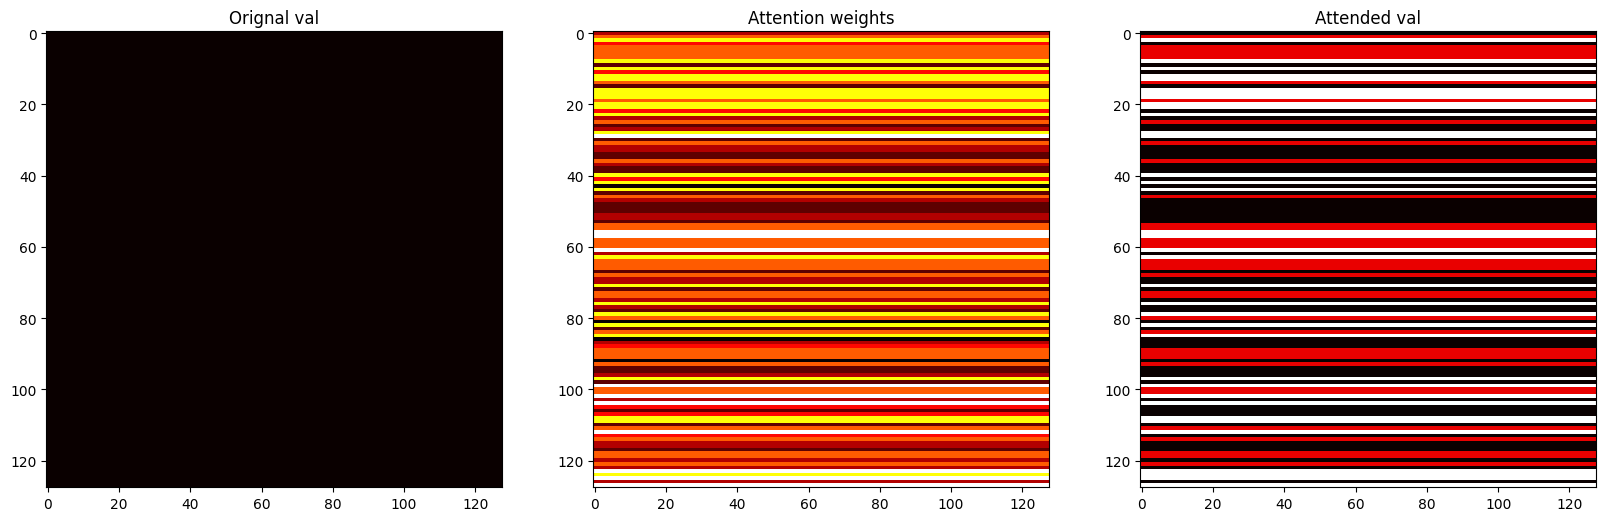

In [70]:
fig, axes = plt.subplots(1, 3, figsize=(20, 10))
fig_names = ['Orignal val', 'Attention weights', 'Attended val']

for i, matrix in enumerate([k_v, attention_weights, attended_vals]):

    axes[i].imshow(matrix, cmap='hot', interpolation='nearest')
    axes[i].set_title(fig_names[i])

plt.show()

## Pytorch Implementation

Now we will use pytorch's nn module to make the attention layer with trainable matrices (thus making the layer trainable)

In [71]:
class DotProductAttention(nn.Module):

    def __init__(self, embedding_length):

        super(DotProductAttention, self).__init__()

        # These linear layers represent the initial matrices that we multiply our Q, K and V with
        # since linear layers are also essentially matrix multiplications
        # and because the size of the input isn't supposed to change, the in and out size of linear layer is the same

        self.query_linear = nn.Linear(embedding_length, embedding_length)
        self.key_linear = nn.Linear(embedding_length, embedding_length)
        self.value_linear = nn.Linear(embedding_length, embedding_length)

    def forward(self, query, key, value):
        # Linear transformations
        transformed_query = self.query_linear(query)
        transformed_key = self.key_linear(key)
        transformed_value = self.value_linear(value)

        # Calculate the attention scores
        scores = torch.matmul(transformed_query, transformed_key.transpose(-2, -1))

        # Softmax to get attention weights
        attention_weights = F.softmax(scores, dim=-1)

        # Multiply attention weights with value to get attended values
        attended_values = torch.matmul(attention_weights, transformed_value)

        return attended_values, attention_weights
